# Challenge Set 1:  MTA Turnstile Data

In [6]:
from __future__ import print_function, division

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import thinkstats2
import thinkplot

ModuleNotFoundError: No module named 'thinkstats2'

In [8]:
import datetime

#### Exercise 1.1

- Open up a new Jupyter notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [18]:




# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from urllib.request import urlopen


# url6 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170401.txt'
# df6=pd.read_csv(url6)
# url7 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170408.txt'
# df7 = pd.read_csv(url7)
# url8 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170415.txt'
# df8 = pd.read_csv(url8)
# url9 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170422.txt'
# df9 = pd.read_csv(url9)
# url10 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170429.txt'
# df10 = pd.read_csv(url10)
url11 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt'
df11 = pd.read_csv(url11)
# url12 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt'
# df12 = pd.read_csv(url12)
# url13 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170520.txt'
# df13= pd.read_csv(url13)
# url14 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170527.txt'
# df14= pd.read_csv(url14)



# frames = [df6, df7, df8, df9,\
#          df10, df11, df12, df13,df14,]

# df = pd.concat(frames)

df=df11


In [19]:
# aha!  an example where we do not have a unique index ??  hmmm..  
# fro=[df7, df9, df11, df13]
# df1 = pd.concat(fro)

# # fre=[df6,df8, df10,df12, df14]
# # df2 = pd.concat(fre)


In [20]:

df.columns = df.columns.str.lower()
# df1.columns = df1.columns.str.lower()
# df2.columns = df2.columns.str.lower()

# df.drop(['c/a','unit','scp','linename', 'division', 
#         'desc'], axis = 1, inplace = True)

In [21]:
df.dtypes
a = len(df)
print (a)
df.replace('0', np.NaN)
df.dropna(inplace = True)
b = len(df)
c = a -b
print ( str(c) + ' rows removed')
b

197290
0 rows removed


197290

In [22]:
#df.isnull().count()
df = df[df.entries != 0]

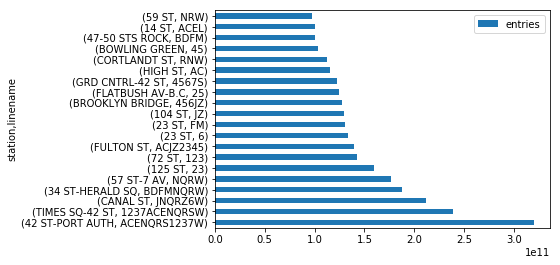

In [26]:
from pylab import figure, axes, pie, title, show
#df.groupby(['station', 'date','time']).mean().sort_values('entries')
##df.groupby(['station', 'datetime']).mean().sort_values('exits', ascending =False)
df.groupby(['station','linename'])[["entries"]].sum().sort_values('entries',ascending =False).head(20).plot(kind= 'barh')


plt.savefig('foo.png', bbox_inches='tight')

In [27]:
df.groupby(['station', 'datetime']).mean().sort_values('entries', ascending =False)


KeyError: 'datetime'

In [ ]:
df["datetime"] = pd.to_datetime(df.date + " " +df.time, format="%m/%d/%Y %H:%M:%S")

In [ ]:
len(df)

In [ ]:
# We can drop our index if we chose to.
df.isnull()
#turnstiles_df=turnstiles_df.reset_index()
#turnstiles_df=turnstiles_df.drop('index',1)
#turnstiles_df.tail()


In [ ]:
turnstiles_df.columns

In [ ]:
# major space issue on exits
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [ ]:
turnstiles_df.columns

In [ ]:
turnstiles_df.head()

In [ ]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()


#### Exercise 1.2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

**This basically means keeping only the date, time, and entries fields
in each list.** You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [ ]:
turnstiles_df.columns

In [ ]:
from datetime import datetime as dt

In [ ]:
# develop filter, .. 
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

In [ ]:
# Convert date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " +turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [ ]:
turnstiles_df.head()

In [ ]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

In [ ]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

In [ ]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
# get datetime properties ~ .dt
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))
turnstiles_df[mask].head()

* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [ ]:
turnstiles_df.DESC.value_counts()

* Since we are only interested in Entries, we might be OK.

In [ ]:

turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
# Get rid of the duplicate entry, be default we'll keep first entry
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [ ]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

* No more duplicate Entries

In [ ]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")
turnstiles_df.head()

#### Exercise 1.3

- **These counts are for every n hours. (What is n?) We want total daily
  entries.**

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [ ]:
# returns a series
turnstiles_daily = turnstiles_df.groupby\
                (["C/A", "UNIT", "SCP", "STATION", "DATE"])\
                .ENTRIES.first().reset_index()
        
turnstiles_daily.head()

In [ ]:
## TODO comment one of these out

In [ ]:
# define two new columns using 
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))
##TRANSFORM 

In [ ]:
# define two new columns using 
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                                       ["DATE", "ENTRIES"]
                                                       .shift())
                                                    

In [ ]:
turnstiles_daily.head(50)

In [ ]:
# Drop rows for first date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [ ]:
turnstiles_daily.head()

In [ ]:
# sanity check : when are previous entries greater than current ? 
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

In [ ]:
# What's the deal with counter going in reverse ? 
# investigate this with turnstiles_df
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date()))
turnstiles_df[mask].head()

# entries going up, datetime going down

* Counter working in Reverse??? - WHHHAT

In [ ]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

# size vs count? 
# size includes NaN values, count does not 

In [ ]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        # see how large these values get..
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [ ]:
# slightly different approach
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"],row['C/A'],row['UNIT'],
             row['SCP'],row['STATION'])
        # assumption is that 
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [ ]:
# Daily_Entries
turnstiles_daily.head()

In [ ]:
# Verify that we got same results via the non-pandas version.

In [ ]:
turnstiles_daily.groupby('STATION').mean().sort_values('DAILY_ENTRIES', ascending=False).DAILY_ENTRIES.head(20).plot(kind='barh')

In [ ]:
df =turnstiles_daily.groupby('STATION').mean().\
sort_values('DAILY_ENTRIES', ascending=False).add_prefix('mean_')
print (df)


In [ ]:
turnstiles_daily.describe()
turnstiles_daily["DAILY_ENTRIES"].isnull().count()

In [ ]:
df = turnstiles_daily 

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
df.describe()

In [ ]:
df = df.dropna()

In [ ]:
df.describe()

In [ ]:
df.isnull().count()

In [ ]:
df.dropna()

In [ ]:
mask = ((turnstiles_df["C/A"] == "A011")
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()
        

In [ ]:
y= df.DATE
x = df.DAILY_ENTRIES

plt.bar(y,
        x,
        color='blue',
        edgecolor='none',
        width=0.5,
        align='center',
        label='y1')


In [ ]:
len(df)

In [ ]:
mask = ['station', 'linename', 'scp', 'unit', 'c/a']
df.groupby(mask)[['entries']].max() - df.groupby(mask)[["entries"]].min()